# Clustering data to unveil Maji Ndogo's water crisis

## Cleaning Our Data

In [1]:
import json
import pandas as pd
import mysql.connector
from tabulate import tabulate

# Load database credentials from config.json
def load_config():
    with open("config.json", "r") as file:
        return json.load(file)

# Load the configuration
config = load_config()

# Function to create a connection to the MySQL database
def create_connection():
    connection = mysql.connector.connect(
        host=config["DB_HOST"],      
        user=config["DB_USER"],      
        password=config["DB_PASSWORD"],  
        database=config["DB_NAME"]      
    )
    return connection

# Create a connection object
conn = create_connection()

# Check the connection status
if conn.is_connected():
    print("Successfully connected to the database")
else:
    print("Failed to connect to the database")


# Function to execute a query and return the result as a DataFrame if it's a SELECT query
def execute_query(query):
    conn = create_connection()  # Replace with your actual function to create a connection
    cursor = conn.cursor()
    cursor.execute(query)
    
    # If it's a SELECT query, return a DataFrame
    if query.strip().upper().startswith("SELECT"):
        results = cursor.fetchall()
        column_names = [desc[0] for desc in cursor.description]
        df = pd.DataFrame(results, columns=column_names)
        
        # Close cursor and connection
        cursor.close()
        conn.close()
        return df
    
    # If it's an UPDATE or other non-SELECT query, commit and close the connection
    else:
        conn.commit()
        cursor.close()
        conn.close()
        print(f"Query executed: {query}")

# Function to color headers with a custom style
def color_header():
    return [{'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                               ('color', 'black'),
                                               ('font-size', '12pt'),
                                               ('text-align', 'center')]}]

# Function to apply cell formatting for individual DataFrame cells
def highlight_cells(val):
    return 'background-color: #f4f4f4'  # Light grey for cell background

# Step 1: Query to generate email addresses for employees
email_query = """
SELECT 
    employee_name, 
    CONCAT(LOWER(REPLACE(employee_name, ' ', '.')), '@ndogowater.gov') AS new_email
FROM employee LIMIT 10;
"""

# Step 2: Execute the query and get the DataFrame
employee_emails_df = execute_query(email_query)

# Step 3: Apply custom table styles and display the styled DataFrame
styled_employee_emails_df = (
    employee_emails_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the DataFrame with styles
print("Employee Emails:")
display(styled_employee_emails_df)


Successfully connected to the database
Employee Emails:


,employee_name,new_email
0,Amara Jengo,amara.jengo@ndogowater.gov
1,Bello Azibo,bello.azibo@ndogowater.gov
2,Bakari Iniko,bakari.iniko@ndogowater.gov
3,Malachi Mavuso,malachi.mavuso@ndogowater.gov
4,Cheche Buhle,cheche.buhle@ndogowater.gov
5,Zuriel Matembo,zuriel.matembo@ndogowater.gov
6,Deka Osumare,deka.osumare@ndogowater.gov
7,Lalitha Kaburi,lalitha.kaburi@ndogowater.gov
8,Enitan Zuri,enitan.zuri@ndogowater.gov
9,Farai Nia,farai.nia@ndogowater.gov


In [2]:
# 1. Update the email column with generated email addresses
update_email_query = """
UPDATE employee
SET email = CONCAT(LOWER(REPLACE(employee_name, ' ', '.')), '@ndogowater.gov');
"""
execute_query(update_email_query)

# 2. Fetch the updated employee table
select_employee_query = """
SELECT employee_name, email
FROM employee LIMIT 10;
"""
employee_df = execute_query(select_employee_query)

# Function to color headers with a custom style
def color_header():
    return [{'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                               ('color', 'black'),
                                               ('font-size', '12pt'),
                                               ('text-align', 'center')]}]

# Function to apply cell formatting for individual DataFrame cells
def highlight_cells(val):
    return 'background-color: #f4f4f4'  # Light grey for cell background

# Apply custom table styles and display the styled DataFrame
styled_employee_df = (
    employee_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the DataFrame with styles (use print() for terminal, display() for Jupyter)
print("Updated Employee Table with Emails:")


# In a Jupyter notebook, use display to see styled output:
display(styled_employee_df)

Query executed: 
UPDATE employee
SET email = CONCAT(LOWER(REPLACE(employee_name, ' ', '.')), '@ndogowater.gov');

Updated Employee Table with Emails:


,employee_name,email
0,Amara Jengo,amara.jengo@ndogowater.gov
1,Bello Azibo,bello.azibo@ndogowater.gov
2,Bakari Iniko,bakari.iniko@ndogowater.gov
3,Malachi Mavuso,malachi.mavuso@ndogowater.gov
4,Cheche Buhle,cheche.buhle@ndogowater.gov
5,Zuriel Matembo,zuriel.matembo@ndogowater.gov
6,Deka Osumare,deka.osumare@ndogowater.gov
7,Lalitha Kaburi,lalitha.kaburi@ndogowater.gov
8,Enitan Zuri,enitan.zuri@ndogowater.gov
9,Farai Nia,farai.nia@ndogowater.gov


In [3]:
# Step 1: SQL query to get the original length of the phone numbers
original_length_query = """
SELECT phone_number, LENGTH(phone_number) AS original_length
FROM employee ;
"""

# Step 2: Execute the query and get the DataFrame
original_length_df = execute_query(original_length_query)

# Step 3: Apply Pandas styling to display the original length of phone numbers
styled_original_length_df = (
    original_length_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the original phone number lengths
print("Original Length of Phone Numbers:")
display(styled_original_length_df)

# Step 4: SQL query to update and trim the phone numbers
trim_phone_number_query = """
UPDATE employee
SET phone_number = TRIM(phone_number);
"""

# Execute the update query to trim the phone numbers
execute_query(trim_phone_number_query)

# Step 5: SQL query to get the new trimmed length of phone numbers
trimmed_length_query = """
SELECT phone_number, LENGTH(phone_number) AS trimmed_length
FROM employee;
"""

# Step 6: Execute the query and get the DataFrame
trimmed_length_df = execute_query(trimmed_length_query)

# Step 7: Apply Pandas styling to display the new length of the trimmed phone numbers
styled_trimmed_length_df = (
    trimmed_length_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the trimmed phone number lengths
print("Trimmed Length of Phone Numbers:")
display(styled_trimmed_length_df)

Original Length of Phone Numbers:


,phone_number,original_length
0,+99637993287,13
1,+99643864786,13
2,+99222599041,13
3,+99945849900,13
4,+99381679640,13
5,+99034075111,13
6,+99379364631,13
7,+99681623240,13
8,+99248509202,13
9,+99570082739,13


Query executed: 
UPDATE employee
SET phone_number = TRIM(phone_number);

Trimmed Length of Phone Numbers:


,phone_number,trimmed_length
0,+99637993287,12
1,+99643864786,12
2,+99222599041,12
3,+99945849900,12
4,+99381679640,12
5,+99034075111,12
6,+99379364631,12
7,+99681623240,12
8,+99248509202,12
9,+99570082739,12


In [4]:
# Step 1: Query to find the top 3 employees with the highest number of locations visited
# We will use COUNT() and GROUP BY, but order by the specified employee IDs instead of counts.
top_employees_query = """
SELECT 
    assigned_employee_id, 
    COUNT(location_id) AS number_of_visits 
FROM visits 
GROUP BY assigned_employee_id 
ORDER BY number_of_visits DESC 
LIMIT 3;
"""

# Step 2: Execute the query and get the DataFrame
top_employees_df = execute_query(top_employees_query)

# Step 3: Rename the columns for clarity
top_employees_df.columns = ['assigned_employee_id', 'number_of_visits']

# Step 4: Display the DataFrame with styles
styled_top_employees_df = (
    top_employees_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the DataFrame with styles
print("Top Employees by Number of Visits:")
display(styled_top_employees_df)

Top Employees by Number of Visits:


,assigned_employee_id,number_of_visits
0,1,3708
1,30,3676
2,34,3539


In [5]:
# Step 1: Query to count the number of records per town
records_per_town_query = """
SELECT 
    town_name, 
    COUNT(*) AS records_per_town 
FROM location 
GROUP BY town_name 
ORDER BY records_per_town DESC;  -- Order by count in descending order
"""

# Step 2: Execute the query and get the DataFrame
records_per_town_df = execute_query(records_per_town_query)

# Step 3: Apply custom table styles and display the styled DataFrame
styled_records_per_town_df = (
    records_per_town_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the DataFrame with styles
print("Records per Town:")
display(styled_records_per_town_df)  # Display styled DataFrame in Jupyter

Records per Town:


,town_name,records_per_town
0,Rural,23740
1,Harare,1650
2,Amina,1090
3,Lusaka,1070
4,Mrembo,990
5,Asmara,930
6,Dahabu,930
7,Kintampo,780
8,Ilanga,780
9,Isiqalo,770


In [6]:
# Step 1: Query to count the number of records per province
records_per_province_query = """
SELECT 
    province_name, 
    COUNT(*) AS records_per_province 
FROM location 
GROUP BY province_name 
ORDER BY records_per_province DESC;  -- Order by count in descending order
"""

# Step 2: Execute the query and get the DataFrame
records_per_province_df = execute_query(records_per_province_query)

# Step 3: Apply custom table styles and display the styled DataFrame
styled_records_per_province_df = (
    records_per_province_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the DataFrame with styles
print("Records per Province:")
display(styled_records_per_province_df)  # Display styled DataFrame in Jupyter

Records per Province:


,province_name,records_per_province
0,Kilimani,9510
1,Akatsi,8940
2,Sokoto,8220
3,Amanzi,6950
4,Hawassa,6030


In [7]:
# Step 1: Query to aggregate records per town, grouped by province and town
records_per_town_query = """
SELECT 
    province_name, 
    town_name, 
    COUNT(*) AS records_per_town 
FROM location 
GROUP BY province_name, town_name 
ORDER BY province_name, records_per_town DESC;  -- Order by province and then by count
"""

# Step 2: Execute the query and get the DataFrame
records_per_town_df = execute_query(records_per_town_query)

# Step 3: Apply custom table styles and display the styled DataFrame
styled_records_per_town_df = (
    records_per_town_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the DataFrame with styles
print("Records per Town by Province:")
display(styled_records_per_town_df)  # Display styled DataFrame in Jupyter

Records per Town by Province:


,province_name,town_name,records_per_town
0,Akatsi,Rural,6290
1,Akatsi,Lusaka,1070
2,Akatsi,Harare,800
3,Akatsi,Kintampo,780
4,Amanzi,Rural,3100
5,Amanzi,Asmara,930
6,Amanzi,Dahabu,930
7,Amanzi,Amina,670
8,Amanzi,Pwani,520
9,Amanzi,Abidjan,400


In [8]:
# Step 1: Query to count the number of records for each location type
records_per_location_type_query = """
SELECT 
    location_type, 
    COUNT(*) AS num_sources 
FROM location 
GROUP BY location_type 
ORDER BY num_sources DESC;  -- Order by count in descending order
"""

# Step 2: Execute the query and get the DataFrame
records_per_location_type_df = execute_query(records_per_location_type_query)

# Step 3: Apply custom table styles and display the styled DataFrame
styled_records_per_location_type_df = (
    records_per_location_type_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the DataFrame with styles
print("Number of Sources by Location Type:")
display(styled_records_per_location_type_df)  # Display styled DataFrame in Jupyter

Number of Sources by Location Type:


,location_type,num_sources
0,Rural,23740
1,Urban,15910


In [9]:
# 1. Total number of people surveyed
total_surveyed_query = "SELECT SUM(visit_count) AS total_surveyed FROM visits;"
total_surveyed_df = execute_query(total_surveyed_query)

# Apply custom table styles and display the styled DataFrame
styled_total_surveyed_df = (
    total_surveyed_df.style
    .applymap(highlight_cells)  # Apply custom function to highlight cells
    .set_table_styles(color_header())  # Apply custom header style
)

# Display the total surveyed
print("Total People Surveyed:")
display(styled_total_surveyed_df)

Total People Surveyed:


,total_surveyed
0,142130


In [10]:
# 2. Count of Wells, Taps, and Rivers
count_sources_query = """
SELECT 
    type_of_water_source, 
    COUNT(*) AS count 
FROM water_source 
WHERE type_of_water_source IN ('well', 'river') 
   OR type_of_water_source LIKE '%tap%' 
GROUP BY type_of_water_source;
"""
count_sources_df = execute_query(count_sources_query)

# Apply custom table styles and display the styled DataFrame
styled_count_sources_df = (
    count_sources_df.style
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the count of sources
print("\nCount of Wells, Taps, and Rivers:")
display(styled_count_sources_df)


Count of Wells, Taps, and Rivers:


,type_of_water_source,count
0,tap_in_home,7265
1,tap_in_home_broken,5856
2,well,17383
3,shared_tap,5767
4,river,3379


In [11]:
# 3. Average number of people sharing each type of water source
average_people_query = """
SELECT 
    type_of_water_source, 
    AVG(number_of_people_served) AS average_people 
FROM water_source 
GROUP BY type_of_water_source;
"""
average_people_df = execute_query(average_people_query)

# Apply custom table styles and display the styled DataFrame
styled_average_people_df = (
    average_people_df.style
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the average number of people sharing sources
print("\nAverage Number of People Sharing Each Type of Water Source:")
display(styled_average_people_df)


Average Number of People Sharing Each Type of Water Source:


,type_of_water_source,average_people
0,tap_in_home,644.0303
1,tap_in_home_broken,648.8593
2,well,278.5321
3,shared_tap,2071.3147
4,river,699.1844


In [12]:
# 4. Total number of people getting water from each type of source
total_people_query = """
SELECT 
    type_of_water_source, 
    SUM(number_of_people_served) AS total_people 
FROM water_source 
GROUP BY type_of_water_source;
"""
total_people_df = execute_query(total_people_query)

# Apply custom table styles and display the styled DataFrame
styled_total_people_df = (
    total_people_df.style
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the total number of people getting water from each type of source
print("\nTotal Number of People Getting Water from Each Type of Source:")
display(styled_total_people_df)


Total Number of People Getting Water from Each Type of Source:


,type_of_water_source,total_people
0,tap_in_home,4678880
1,tap_in_home_broken,3799720
2,well,4841724
3,shared_tap,11945272
4,river,2362544


In [13]:
# 2. Count of Different Water Source Types
count_sources_query = """
SELECT 
    type_of_water_source, 
    COUNT(*) AS count 
FROM water_source 
GROUP BY type_of_water_source 
ORDER BY count DESC;
"""
count_sources_df = execute_query(count_sources_query)

# Apply custom table styles and display the styled DataFrame
styled_count_sources_df = (
    count_sources_df.style
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the count of sources
print("\nCount of Different Water Source Types:")
display(styled_count_sources_df)


Count of Different Water Source Types:


,type_of_water_source,count
0,well,17383
1,tap_in_home,7265
2,tap_in_home_broken,5856
3,shared_tap,5767
4,river,3379


In [14]:
# 3. Average Number of People Served by Each Water Source
average_people_query = """
SELECT 
    type_of_water_source, 
    AVG(number_of_people_served) AS average_people_served 
FROM water_source 
GROUP BY type_of_water_source 
ORDER BY average_people_served DESC;
"""
average_people_df = execute_query(average_people_query)

# Apply custom table styles and display the styled DataFrame
styled_average_people_df = (
    average_people_df.style
    .format({'average_people_served': '{:,.2f}'})  # Format the average for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the average number of people served by each water source
print("\nAverage Number of People Served by Each Water Source:")
display(styled_average_people_df)


Average Number of People Served by Each Water Source:


,type_of_water_source,average_people_served
0,shared_tap,"2,071.31"
1,river,699.18
2,tap_in_home_broken,648.86
3,tap_in_home,644.03
4,well,278.53


In [15]:
# 4. Total Number of People Served by Each Type of Water Source
total_people_query = """
SELECT 
    type_of_water_source, 
    SUM(number_of_people_served) AS total_people_served 
FROM water_source 
GROUP BY type_of_water_source 
ORDER BY total_people_served DESC;
"""
total_people_df = execute_query(total_people_query)

# Apply custom table styles and display the styled DataFrame
styled_total_people_df = (
    total_people_df.style
    .format({'total_people_served': '{:,.0f}'})  # Format the total for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the total number of people served by each water source
print("\nTotal Number of People Served by Each Type of Water Source:")
display(styled_total_people_df)



Total Number of People Served by Each Type of Water Source:


,type_of_water_source,total_people_served
0,shared_tap,"11,945,272"
1,well,"4,841,724"
2,tap_in_home,"4,678,880"
3,tap_in_home_broken,"3,799,720"
4,river,"2,362,544"


In [16]:
# 5. Percentage of People Served by Each Type of Water Source
percentage_people_query = """
SELECT 
    type_of_water_source, 
    SUM(number_of_people_served) AS total_people_served,
    ROUND(SUM(number_of_people_served) / (SELECT SUM(number_of_people_served) FROM water_source) * 100, 2) AS percentage_served
FROM water_source 
GROUP BY type_of_water_source 
ORDER BY total_people_served DESC;
"""
percentage_people_df = execute_query(percentage_people_query)

# Apply custom table styles and display the styled DataFrame
styled_percentage_people_df = (
    percentage_people_df.style
    .format({'total_people_served': '{:,.0f}', 'percentage_served': '{:.2f}'})  # Format for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the percentage of people served by each water source
print("\nPercentage of People Served by Each Type of Water Source:")
display(styled_percentage_people_df)


Percentage of People Served by Each Type of Water Source:


,type_of_water_source,total_people_served,percentage_served
0,shared_tap,"11,945,272",43.24
1,well,"4,841,724",17.52
2,tap_in_home,"4,678,880",16.94
3,tap_in_home_broken,"3,799,720",13.75
4,river,"2,362,544",8.55


In [17]:
# 5. Percentage of People Served by Each Type of Water Source (rounded to 0 decimals)
percentage_people_query = """
SELECT 
    type_of_water_source, 
    SUM(number_of_people_served) AS total_people_served,
    ROUND(SUM(number_of_people_served) / (SELECT SUM(number_of_people_served) FROM water_source) * 100, 0) AS percentage_served
FROM water_source 
GROUP BY type_of_water_source 
ORDER BY percentage_served DESC;
"""
percentage_people_df = execute_query(percentage_people_query)

# Apply custom table styles and display the styled DataFrame
styled_percentage_people_df = (
    percentage_people_df.style
    .format({'total_people_served': '{:,.0f}', 'percentage_served': '{:.0f}'})  # Format for readability with no decimals
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the percentage of people served by each water source
print("\nPercentage of People Served by Each Type of Water Source (Rounded):")
display(styled_percentage_people_df)



Percentage of People Served by Each Type of Water Source (Rounded):


,type_of_water_source,total_people_served,percentage_served
0,shared_tap,"11,945,272",43
1,well,"4,841,724",18
2,tap_in_home,"4,678,880",17
3,tap_in_home_broken,"3,799,720",14
4,river,"2,362,544",9


In [18]:
# 6. Percentage of People Served with Rank using User-Defined Variable
percentage_people_rank_query = """
SELECT 
    type_of_water_source, 
    total_people_served,
    ROUND(total_people_served / (SELECT SUM(number_of_people_served) FROM water_source) * 100, 0) AS percentage_served,
    @source_rank := @source_rank + 1 AS source_rank
FROM (
    SELECT 
        type_of_water_source, 
        SUM(number_of_people_served) AS total_people_served
    FROM water_source 
    GROUP BY type_of_water_source 
    ORDER BY total_people_served DESC
) AS source_summary,
(SELECT @source_rank := 0) r  -- Initialize the source_rank variable
ORDER BY total_people_served DESC;
"""

percentage_people_rank_df = execute_query(percentage_people_rank_query)

# Apply custom table styles and display the styled DataFrame
styled_percentage_people_rank_df = (
    percentage_people_rank_df.style
    .format({'total_people_served': '{:,.0f}', 'percentage_served': '{:.0f}', 'source_rank': '{:.0f}'})  # Format for readability with no decimals
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the percentage of people served with rank
print("\nPercentage of People Served by Each Type of Water Source with Source Rank:")
display(styled_percentage_people_rank_df)



Percentage of People Served by Each Type of Water Source with Source Rank:


,type_of_water_source,total_people_served,percentage_served,source_rank
0,shared_tap,"11,945,272",43,1
1,well,"4,841,724",18,2
2,tap_in_home,"4,678,880",17,3
3,tap_in_home_broken,"3,799,720",14,4
4,river,"2,362,544",9,5


In [19]:
# Query for Improvable Sources with Ranking
improvable_sources_query = """
SELECT 
    source_id,
    type_of_water_source, 
    number_of_people_served,
    RANK() OVER (PARTITION BY type_of_water_source ORDER BY number_of_people_served DESC) AS priority_rank
FROM water_source 
WHERE type_of_water_source IN ('tap_in_home_broken', 'well', 'river')  -- Filter for improvable sources
ORDER BY type_of_water_source, priority_rank LIMIT 10;  -- Order by type and rank
"""

improvable_sources_df = execute_query(improvable_sources_query)

# Apply custom table styles and display the styled DataFrame
styled_improvable_sources_df = (
    improvable_sources_df.style
    .format({'number_of_people_served': '{:,.0f}'})  # Format for readability with no decimals
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the DataFrame of improvable sources with rank
print("\nImprovable Sources with Ranking:")
display(styled_improvable_sources_df)



Improvable Sources with Ranking:


,source_id,type_of_water_source,number_of_people_served,priority_rank
0,SoRu36880224,river,998,1
1,SoRu36791224,river,998,1
2,SoRu37756224,river,998,1
3,SoRu38142224,river,998,1
4,SoIl32972224,river,998,1
5,SoRu36238224,river,998,1
6,SoRu34798224,river,998,1
7,SoRu35837224,river,998,1
8,SoMa33775224,river,998,1
9,KiRu28591224,river,998,1


In [20]:
# Query to calculate average queue time
average_queue_time_query = """
SELECT 
    AVG(time_in_queue) AS average_queue_time
FROM visits;
"""
average_queue_time_df = execute_query(average_queue_time_query)

# Apply custom table styles and display the styled DataFrame
styled_average_queue_time_df = (
    average_queue_time_df.style
    .format({'average_queue_time': '{:,.2f}'})  # Format for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the average queue time
print("\nAverage Total Queue Time for Water:")
display(styled_average_queue_time_df)




Average Total Queue Time for Water:


,average_queue_time
0,60.75


In [21]:
# Query to calculate total survey duration
total_survey_duration_query = """
SELECT 
    SUM(time_in_queue) AS total_survey_duration
FROM visits;
"""
total_survey_duration_df = execute_query(total_survey_duration_query)

# Display the total survey duration
print("\nTotal Survey Duration:")
display(total_survey_duration_df)



Total Survey Duration:


,total_survey_duration
0,3653597


In [22]:
# Query to calculate average queue time per day of the week using DAYNAME
average_queue_time_per_day_query = """
SELECT 
    DAYNAME(time_of_record) AS day_of_week, 
    AVG(time_in_queue) AS average_queue_time
FROM visits
GROUP BY day_of_week
ORDER BY FIELD(day_of_week, 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday');
"""
average_queue_time_per_day_df = execute_query(average_queue_time_per_day_query)

# Apply custom table styles and display the styled DataFrame
styled_average_queue_time_per_day_df = (
    average_queue_time_per_day_df.style
    .format({'average_queue_time': '{:,.2f}'})  # Format for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the average queue time per day
print("\nAverage Queue Time per Day of the Week:")
display(styled_average_queue_time_per_day_df)



Average Queue Time per Day of the Week:


,day_of_week,average_queue_time
0,Monday,59.68
1,Tuesday,47.08
2,Wednesday,42.54
3,Thursday,46.02
4,Friday,52.74
5,Saturday,246.29
6,Sunday,81.53


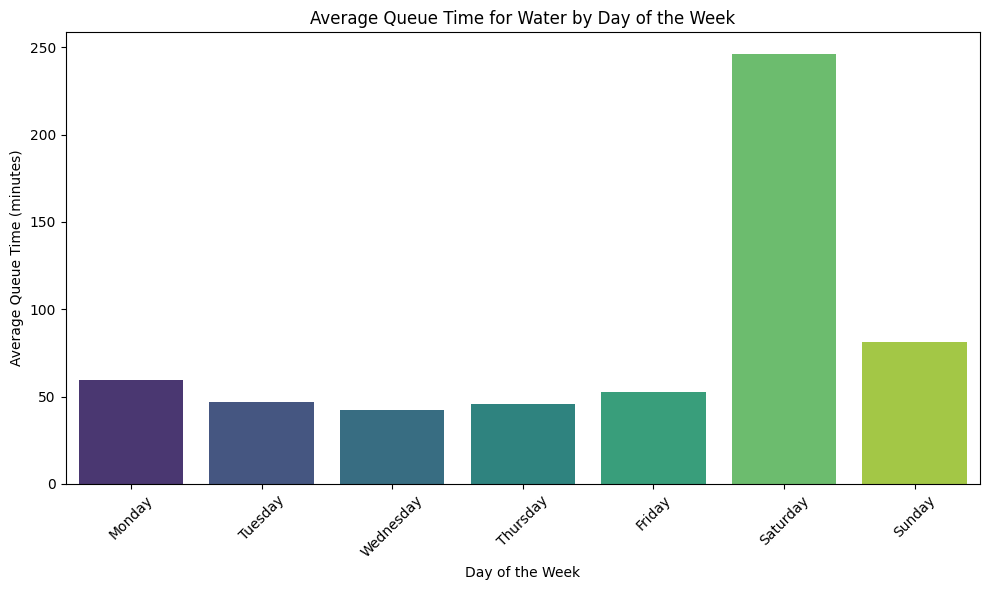

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for visualization
# Define the days in the correct order
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Extract average queue times from the DataFrame
average_times = [
    average_queue_time_per_day_df[average_queue_time_per_day_df['day_of_week'] == day]['average_queue_time'].values[0]
    for day in days
]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=average_times, palette="viridis")
plt.title("Average Queue Time for Water by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Queue Time (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
# Query to calculate the average queue time by hour of the day
average_queue_time_by_hour_query = """
SELECT 
    TIME_FORMAT(TIME(time_of_record), '%H:00') AS hour_of_day,
    AVG(time_in_queue) AS avg_queue_time
FROM visits
GROUP BY hour_of_day
ORDER BY hour_of_day;  -- Order by the hour_of_day column
"""

# Execute the query and get the DataFrame
average_queue_time_by_hour_df = execute_query(average_queue_time_by_hour_query)

# Apply custom table styles and display the styled DataFrame
styled_average_queue_time_by_hour_df = (
    average_queue_time_by_hour_df.style
    .format({'avg_queue_time': '{:,.0f}'})  # Format for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the average queue time by hour of the day
print("\nAverage Queue Time by Hour of the Day:")
display(styled_average_queue_time_by_hour_df)



Average Queue Time by Hour of the Day:


,hour_of_day,avg_queue_time
0,06:00,149
1,07:00,149
2,08:00,149
3,09:00,49
4,10:00,48
5,11:00,46
6,12:00,47
7,13:00,47
8,14:00,47
9,15:00,48


In [25]:
# Query to calculate the average queue time by hour of the day on Sundays
average_queue_time_sunday_query = """
SELECT 
    TIME_FORMAT(TIME(time_of_record), '%H:00') AS hour_of_day,
    AVG(time_in_queue) AS avg_queue_time
FROM visits
WHERE 
    time_in_queue != 0  -- Exclude records with zero queue time
    AND DAYNAME(time_of_record) = 'Sunday'  -- Only include Sundays
GROUP BY hour_of_day
ORDER BY hour_of_day;  -- Order by the hour_of_day column
"""

# Execute the query and get the DataFrame
average_queue_time_sunday_df = execute_query(average_queue_time_sunday_query)

# Apply custom table styles and display the styled DataFrame
styled_average_queue_time_sunday_df = (
    average_queue_time_sunday_df.style
    .format({'avg_queue_time': '{:,.0f}'})  # Format for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the average queue time by hour of the day for Sundays
print("\nAverage Queue Time by Hour of the Day on Sundays:")
display(styled_average_queue_time_sunday_df)



Average Queue Time by Hour of the Day on Sundays:


,hour_of_day,avg_queue_time
0,06:00,79
1,07:00,82
2,08:00,86
3,09:00,84
4,10:00,83
5,11:00,78
6,12:00,78
7,13:00,81
8,14:00,83
9,15:00,83


In [26]:
# Query to calculate average queue time per hour of the day for each day of the week
average_queue_time_per_hour_query = """
SELECT
    TIME_FORMAT(TIME(time_of_record), '%H:00') AS hour_of_day,
    -- Sunday
    ROUND(AVG(
        CASE
            WHEN DAYNAME(time_of_record) = 'Sunday' THEN time_in_queue
            ELSE NULL
        END), 0) AS Sunday,
    -- Monday
    ROUND(AVG(
        CASE
            WHEN DAYNAME(time_of_record) = 'Monday' THEN time_in_queue
            ELSE NULL
        END), 0) AS Monday,
    -- Tuesday
    ROUND(AVG(
        CASE
            WHEN DAYNAME(time_of_record) = 'Tuesday' THEN time_in_queue
            ELSE NULL
        END), 0) AS Tuesday,
    -- Wednesday
    ROUND(AVG(
        CASE
            WHEN DAYNAME(time_of_record) = 'Wednesday' THEN time_in_queue
            ELSE NULL
        END), 0) AS Wednesday,
    -- Thursday
    ROUND(AVG(
        CASE
            WHEN DAYNAME(time_of_record) = 'Thursday' THEN time_in_queue
            ELSE NULL
        END), 0) AS Thursday,
    -- Friday
    ROUND(AVG(
        CASE
            WHEN DAYNAME(time_of_record) = 'Friday' THEN time_in_queue
            ELSE NULL
        END), 0) AS Friday,
    -- Saturday
    ROUND(AVG(
        CASE
            WHEN DAYNAME(time_of_record) = 'Saturday' THEN time_in_queue
            ELSE NULL
        END), 0) AS Saturday
FROM visits
WHERE time_in_queue != 0 -- Exclude records with zero queue time
GROUP BY hour_of_day
ORDER BY hour_of_day;
"""

# Execute the query
average_queue_time_per_hour_df = execute_query(average_queue_time_per_hour_query)

# Apply custom table styles and display the styled DataFrame
styled_average_queue_time_per_hour_df = (
    average_queue_time_per_hour_df.style
    .format({'hour_of_day': '{:s}', 'Sunday': '{:,.0f}', 'Monday': '{:,.0f}', 
             'Tuesday': '{:,.0f}', 'Wednesday': '{:,.0f}', 'Thursday': '{:,.0f}', 
             'Friday': '{:,.0f}', 'Saturday': '{:,.0f}'})  # Format for readability
    .applymap(highlight_cells)
    .set_table_styles(color_header())
)

# Display the average queue time per hour of the day
print("\nAverage Queue Time per Hour of the Day by Day of the Week:")
display(styled_average_queue_time_per_hour_df)



Average Queue Time per Hour of the Day by Day of the Week:


,hour_of_day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,06:00,79,190,134,112,134,153,247
1,07:00,82,186,128,111,139,156,247
2,08:00,86,183,130,119,129,153,247
3,09:00,84,127,105,94,99,107,252
4,10:00,83,119,99,89,95,112,259
5,11:00,78,115,102,86,99,104,236
6,12:00,78,115,97,88,96,109,239
7,13:00,81,122,97,98,101,115,242
8,14:00,83,127,104,92,96,110,244
9,15:00,83,126,104,88,92,110,248


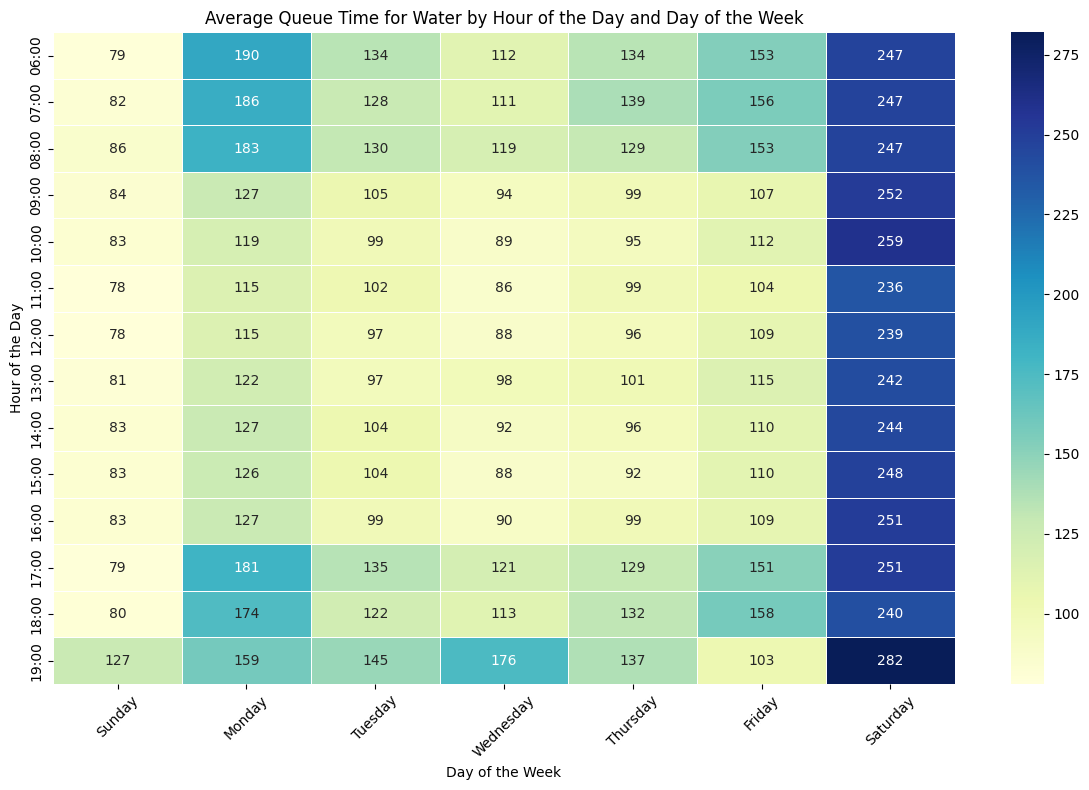

In [27]:
# Ensure all columns (days of the week) are numeric
heatmap_data = average_queue_time_per_hour_df.set_index('hour_of_day').apply(pd.to_numeric, errors='coerce')

# Replace NaN or missing values with 0 or another placeholder if needed
heatmap_data.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

# Set titles and labels
plt.title("Average Queue Time for Water by Hour of the Day and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()